In [1]:
from matplotlib import animation
from from_wave import *

save_path = "../plots"

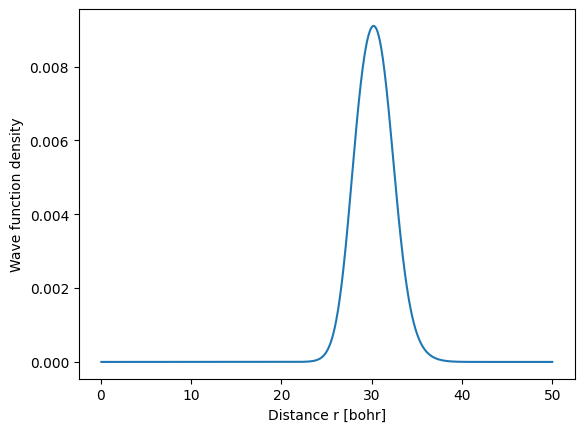

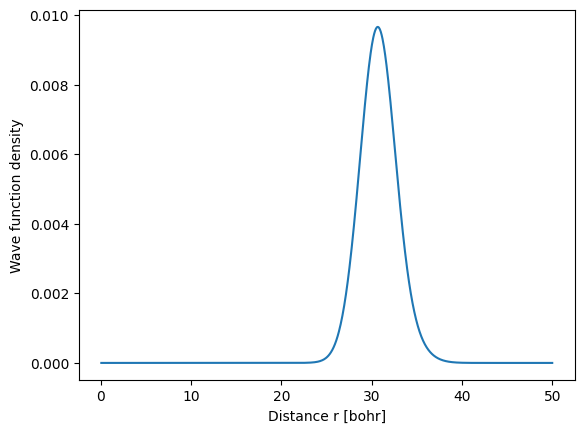

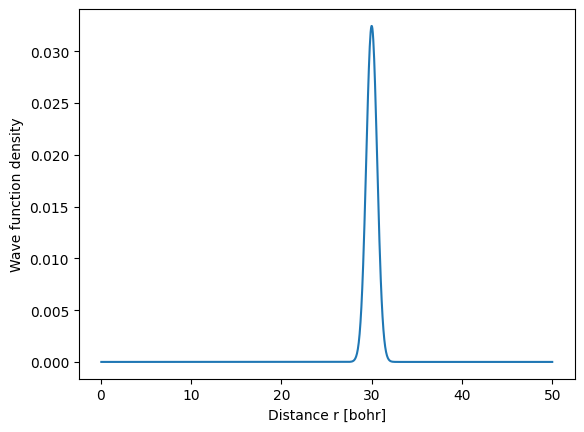

In [4]:
anim = distance_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_distance_animation.gif', writer="pillow", fps=30)

anim = distance_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_distance_animation.gif', writer="pillow", fps=30)

anim = distance_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_distance_animation.gif', writer="pillow", fps=30)

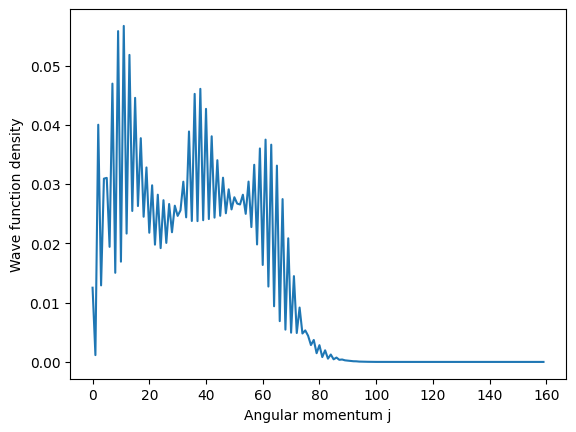

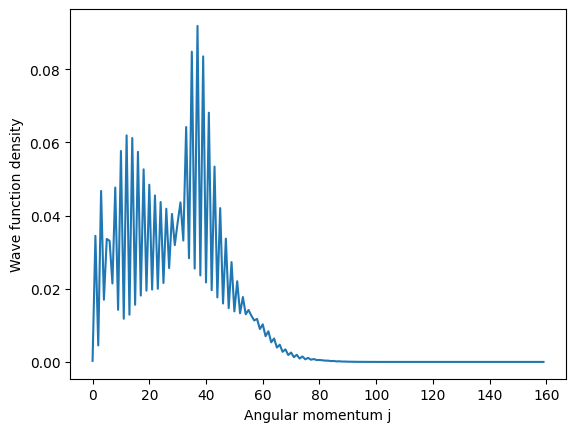

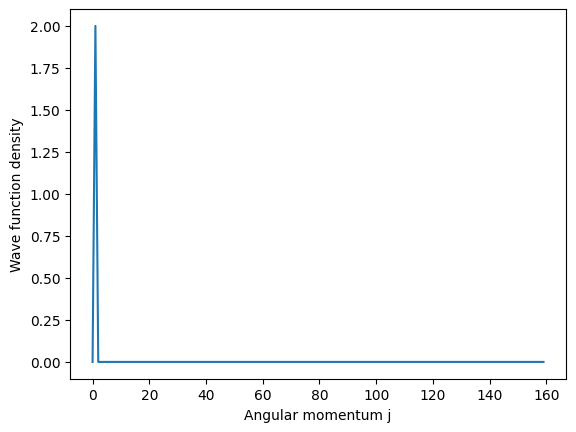

In [5]:
anim = angular_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_angular_animation.gif', writer="pillow", fps=30)

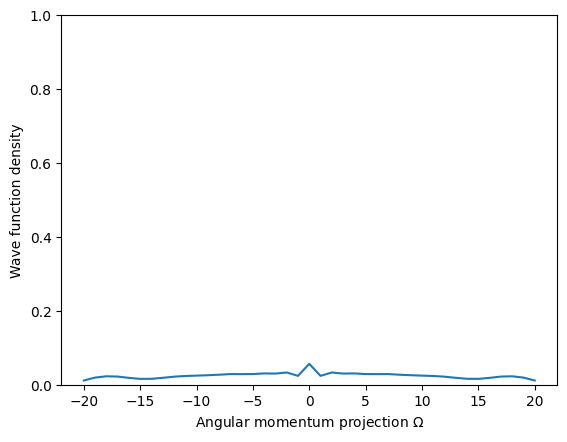

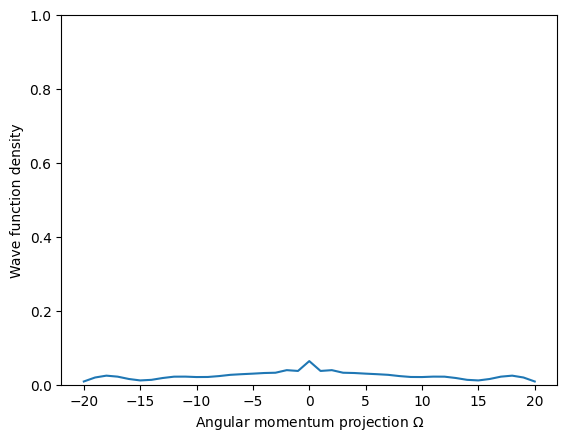

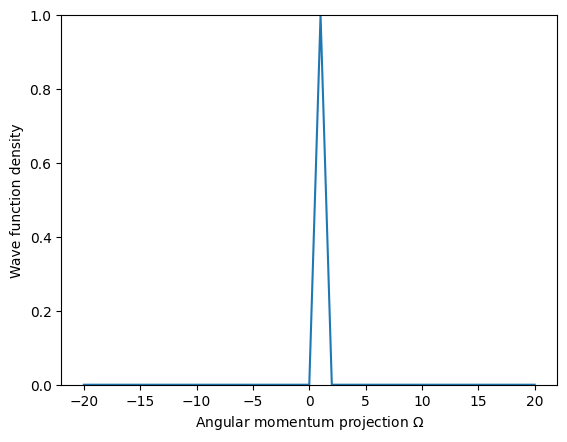

In [2]:
anim = omega_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_omega_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_omega_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_omega_animation.gif', writer="pillow", fps=30)

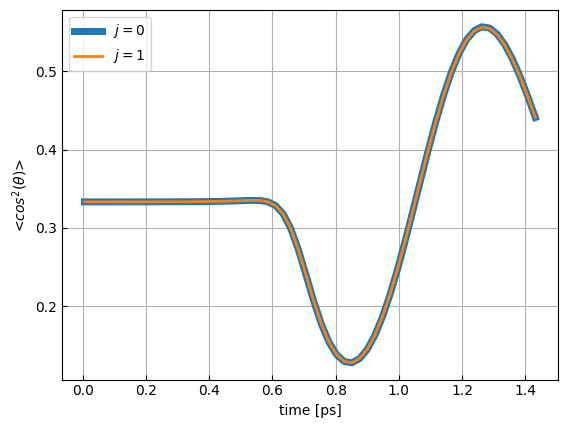

In [4]:
fig, ax = alignements("coriolis", [0, 1])
ax.lines[0].set_linewidth(5)
ax.lines[1].set_linewidth(2)
ax.legend()

pass

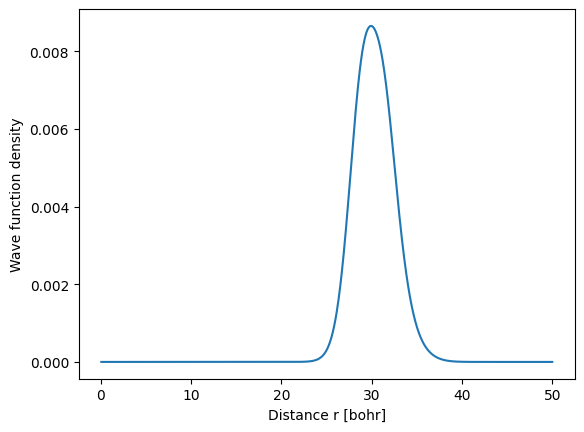

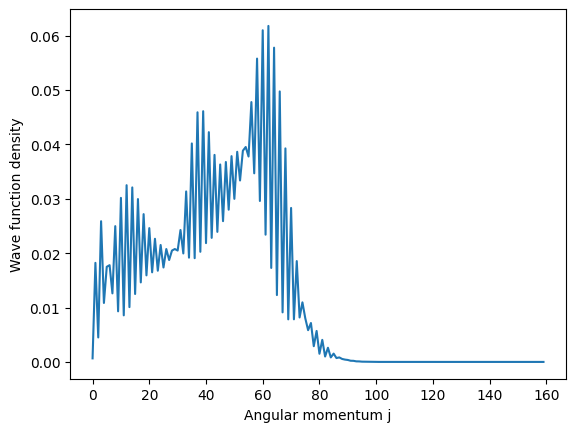

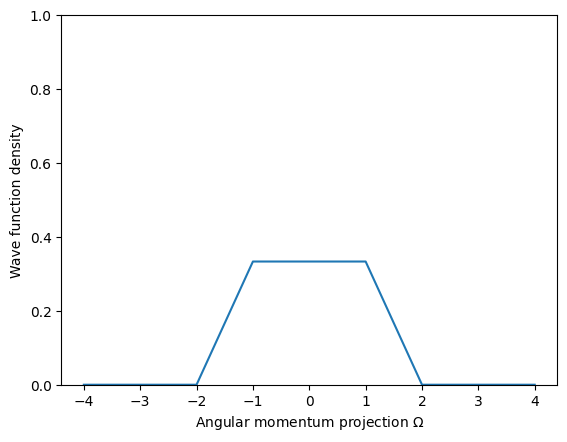

In [8]:
anim = distance_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_distance_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_angular_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_omega_animation.gif', writer="pillow", fps=30)

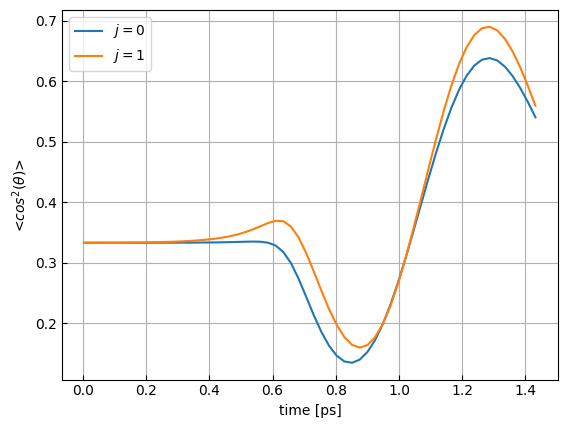

In [5]:
fig, ax = alignement_mixed("coriolis", [0, 1])
ax.legend()

pass